In [1]:
#Name : Priyanshu Mahukhaye
#Roll : 43341

# **Problem Statement 1**


Feedforward Neural Network

Implementing Feedforward neural networks with Keras and Tensorflow for classification of handwritten MNIST dataset using below steps



```
a. import the necessary packages
b. Load the training and testing dataset
c. Define the network architecture using Keras
d. Train the model using SGD with 11 epochs
e. Evaluate the network
f. Plot the training loss and accuracy
```



## **Import the necessary packages**

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K


import matplotlib.pyplot as plt
import numpy as np

## **Load training and testing data**

In [4]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
lb = LabelBinarizer()

In [7]:
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

## **Defining network architecture using Keras**

In [8]:
model = Sequential()
model.add(Dense(128, input_shape =(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Train the model using SGD with 11 epochs**

In [9]:
sgd = SGD(0.01)
epochs = 11
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=128)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1224 - loss: 2.3426 - val_accuracy: 0.2543 - val_loss: 2.2539
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2967 - loss: 2.2415 - val_accuracy: 0.4271 - val_loss: 2.1969
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4378 - loss: 2.1812 - val_accuracy: 0.5665 - val_loss: 2.1169
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5386 - loss: 2.0956 - val_accuracy: 0.5861 - val_loss: 2.0026
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5658 - loss: 1.9730 - val_accuracy: 0.6150 - val_loss: 1.8481
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6150 - loss: 1.8113 - val_accuracy: 0.6528 - val_loss: 1.6672
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6501 - loss: 1.6307 - val_accuracy: 0.6867 - val_loss: 1.4883
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6833 - loss: 1.4606 - val_accuracy: 0

## **Evaluate Network**

In [11]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       980
           1       0.80      0.97      0.88      1135
           2       0.81      0.75      0.78      1032
           3       0.67      0.84      0.75      1010
           4       0.71      0.75      0.73       982
           5       0.78      0.48      0.60       892
           6       0.87      0.88      0.87       958
           7       0.81      0.86      0.83      1028
           8       0.81      0.55      0.66       974
           9       0.68      0.63      0.65      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.77     10000



## **Plot Training Loss and Accuracy**

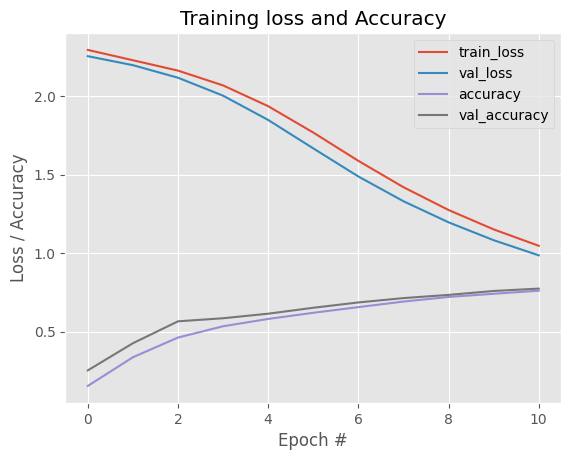

In [18]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, epochs), H.history['loss'], label="train_loss")
plt.plot(np.arange(0, epochs), H.history['val_loss'], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_accuracy")


plt.title("Training loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.show()

In [13]:
pltpl